In [1]:
import math

## External Input

In [2]:
def ext_input(A, c, cue, epsilon):
    def h(theta):
        return A*c*(1 - epsilon + epsilon * math.cos(2*(theta - cue)))
    return h

In [3]:
ext_input

<function __main__.ext_input(A, c, cue, epsilon)>

## Recurrent Input

In [4]:
def rec_input(J_0, J_2, arr):
    def ri(theta):
        res = 0
        for i in range(len(arr)):
            alpha = (math.pi / len(arr))*(i+1) - (math.pi/2)
            res += (J_0 + J_2*math.cos(2*(theta - alpha)))*arr[i]
        return res/math.pi
    return ri

## Input-Output Relationship

In [5]:
def F(x):
    if x < 0 :
        return 0
    else:
        return x

## Solving the system using Runge Kutta 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# this function gives back a matrix corresponding to the system of ODEs
def rec_input_2(J_0, J_2, N):
    res = []
    for i in range(N):
        res_row = []
        theta_i = (math.pi / N)*(i+1) - (math.pi/2)
        for j in range(N):
            theta_j = (math.pi / N)*(j+1) - (math.pi/2)
            res_ent = J_0 + J_2*(math.cos(2*(theta_i - theta_j)))
            res_ent = res_ent / math.pi
            res_row.append(res_ent)
        res.append(res_row)
    res_1 = np.array(res)
    res_2 = np.asmatrix(res_1)
    return res_2

In [7]:
arr = np.array([1,2,3,4])
col = arr.shape
print(col[0] + 1)
arr[0] = 0
print(arr)

5
[0 2 3 4]


In [8]:
# this function gives back the h(theta) in vector form
def ext_input_2(A, c, cue, epsilon, N):
    res = []
    for k in range(N):
        theta_k = (math.pi / N)*(k+1) - (math.pi/2)
        res.append(ext_input(A, c, cue, epsilon)(theta_k))
    return np.array(res)

In [9]:
#
def Runge_Kutta_step(ext_in, rec_in, r, tao):
    # print(np.matmul(rec_in, r.transpose()).shape)
    mat_0 = np.matmul(rec_in, r)
    mat = np.add(ext_in, mat_0)
    row = mat.shape[0]
    for p in range(row):
        new_val = F(mat.item((p,0)))
        mat.itemset((p,0), new_val)
    return np.add(-r, mat) / tao

In [10]:
def initial_cond(a, cue, N):
    res = []
    for i in range(N):
        theta_i = (math.pi / N)*(i+1) - (math.pi/2)
        ent = a*math.cos(2*(theta_i - cue))
        res.append(ent)
    return np.array(res)

In [11]:
# function to calculate euclidean distance of two numpy vectors
def euc_norm(a):
    m = a.shape[0]
    dist = 0
    for i in range(m):
        dist += (a.item(i,0))*(a.item(i,0))
    dist = math.sqrt(dist)
    return dist

In [12]:
# unit test
a = np.array([1,1,0,0])
a = np.asmatrix(a).transpose()
print(euc_norm(a))

1.4142135623730951


## Q(1) c = 0.1

In [13]:
# setting the initial condition
init = initial_cond(2,0,50)
r_i = init
r_i = np.asmatrix(r_i)
r_i = r_i.transpose()
print(r_i)

[[-1.9842294 ]
 [-1.93716632]
 [-1.85955297]
 [-1.75261336]
 [-1.61803399]
 [-1.45793725]
 [-1.27484798]
 [-1.07165359]
 [-0.85155858]
 [-0.61803399]
 [-0.37476263]
 [-0.12558104]
 [ 0.12558104]
 [ 0.37476263]
 [ 0.61803399]
 [ 0.85155858]
 [ 1.07165359]
 [ 1.27484798]
 [ 1.45793725]
 [ 1.61803399]
 [ 1.75261336]
 [ 1.85955297]
 [ 1.93716632]
 [ 1.9842294 ]
 [ 2.        ]
 [ 1.9842294 ]
 [ 1.93716632]
 [ 1.85955297]
 [ 1.75261336]
 [ 1.61803399]
 [ 1.45793725]
 [ 1.27484798]
 [ 1.07165359]
 [ 0.85155858]
 [ 0.61803399]
 [ 0.37476263]
 [ 0.12558104]
 [-0.12558104]
 [-0.37476263]
 [-0.61803399]
 [-0.85155858]
 [-1.07165359]
 [-1.27484798]
 [-1.45793725]
 [-1.61803399]
 [-1.75261336]
 [-1.85955297]
 [-1.93716632]
 [-1.9842294 ]
 [-2.        ]]


In [14]:
# setting the external input vector
ext_in = ext_input_2(40, 0.1, 0, 0.1, 50)
ext_in = np.asmatrix(ext_in)
ext_in = ext_in.transpose()

In [15]:
rec_in = rec_input_2(-0.5, 1, 50)

In [16]:
step_size = 0.01
num_steps = 1000

min_ri = r_i
min_dist = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
print(-1, min_dist)
for i in range(num_steps):
    k_1 = Runge_Kutta_step(ext_in, rec_in, r_i, 10)
    k_2 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_1), 10)
    k_3 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_2), 10)
    k_4 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, step_size * k_3), 10)
    r_i = np.add(r_i, (step_size/6) * np.add(k_1, np.add(2*k_2, np.add(2*k_3, k_4))))
    # print(i, r_i)
    d = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
    # print(i, d)
    if d <= min_dist:
        print(i)
        min_ri = r_i
        min_dist = d
print(min_ri)
print(min_dist)

-1 6.777274786652526
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
2

### Activity Profile Plot

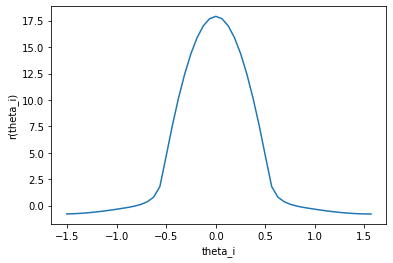

In [17]:
rates = []
angles = []
for i in range(50):
    rates.append(min_ri.item((i,0)))
    angles.append((math.pi / 50)*(i+1) - (math.pi/2))
plt.plot(angles, rates)
plt.ylabel("r(theta_i)")
plt.xlabel("theta_i")
plt.show()

### Tuning curve of the neuron, theta = 0

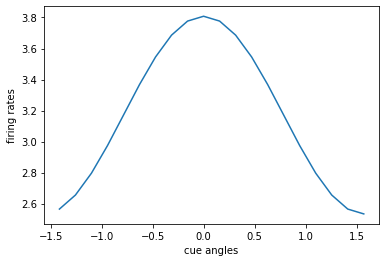

In [13]:
input_angles = []
res_firing_rates = []
for k in range(20):
    cue = (math.pi / 20)*(k+1) - (math.pi/2)
    input_angles.append(cue)
    # setting the initial condition
    r_0 = 2 * math.cos(2*(-cue))
    # setting the external input
    h_0 = 40 * 0.1 * (1 - 0.1 + 0.1 * (math.cos(-2* cue)))
    # setting Runge-Kutta step size and step number
    size = 0.1
    num = 200
    # steady states var
    min_dist_val = 10000
    min_r_0= r_0
    for i in range(num):
        # setting the recurrent input
        f_0 = (-0.5 + 1)*r_0 / math.pi
        I = h_0 + f_0
        k_1 = (-r_0 + F(I))/10
        k_2 = (-(r_0 + (size/2) * k_1) + F(h_0 + (-0.5 + 1)*((size/2) * k_1) / math.pi))/10
        k_3 = (-(r_0 + (size/2) * k_2) + F(h_0 + (-0.5 + 1)*((size/2) * k_2) / math.pi))/10
        k_4 = (-(r_0 + size * k_3) + F(h_0 + (-0.5 + 1)*(size * k_3) / math.pi))/10
        r_0 += (size)/6 *(k_1 + 2*k_2 + 2*k_3 + k_4)
        if abs((-r_0 + F(I))/10) <= min_dist_val:
            min_dist_val = abs((-r_0 + F(I))/10)
            min_r_0 = r_0
    res_firing_rates.append(min_r_0)
#plot them
plt.plot(input_angles, res_firing_rates)
plt.xlabel("cue angles")
plt.ylabel("firing rates")
plt.show()

## Q(1) c = 0.2

In [18]:
# setting the initial condition
init = initial_cond(2,0,50)
r_i = init
r_i = np.asmatrix(r_i)
r_i = r_i.transpose()
print(r_i)

[[-1.9842294 ]
 [-1.93716632]
 [-1.85955297]
 [-1.75261336]
 [-1.61803399]
 [-1.45793725]
 [-1.27484798]
 [-1.07165359]
 [-0.85155858]
 [-0.61803399]
 [-0.37476263]
 [-0.12558104]
 [ 0.12558104]
 [ 0.37476263]
 [ 0.61803399]
 [ 0.85155858]
 [ 1.07165359]
 [ 1.27484798]
 [ 1.45793725]
 [ 1.61803399]
 [ 1.75261336]
 [ 1.85955297]
 [ 1.93716632]
 [ 1.9842294 ]
 [ 2.        ]
 [ 1.9842294 ]
 [ 1.93716632]
 [ 1.85955297]
 [ 1.75261336]
 [ 1.61803399]
 [ 1.45793725]
 [ 1.27484798]
 [ 1.07165359]
 [ 0.85155858]
 [ 0.61803399]
 [ 0.37476263]
 [ 0.12558104]
 [-0.12558104]
 [-0.37476263]
 [-0.61803399]
 [-0.85155858]
 [-1.07165359]
 [-1.27484798]
 [-1.45793725]
 [-1.61803399]
 [-1.75261336]
 [-1.85955297]
 [-1.93716632]
 [-1.9842294 ]
 [-2.        ]]


In [19]:
# setting the external input vector
ext_in = ext_input_2(40, 0.2, 0, 0.1, 50)
ext_in = np.asmatrix(ext_in)
ext_in = ext_in.transpose()

In [20]:
rec_in = rec_input_2(-0.5, 1, 50)

In [21]:
step_size = 0.1
num_steps = 500

min_ri = r_i
min_dist = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
print(-1, min_dist)
for i in range(num_steps):
    k_1 = Runge_Kutta_step(ext_in, rec_in, r_i, 10)
    k_2 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_1), 10)
    k_3 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_2), 10)
    k_4 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, step_size * k_3), 10)
    r_i = np.add(r_i, (step_size/6) * np.add(k_1, np.add(2*k_2, np.add(2*k_3, k_4))))
    # print(i, r_i)
    d = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
    # print(i, d)
    if d <= min_dist:
        print(i)
        min_ri = r_i
        min_dist = d
print(min_ri)
print(min_dist)

-1 8.694324465351047
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
[[-1.03585858]
 [-1.0112895 ]
 [-0.97077178]
 [-0.9149444 ]
 [-0.84468781]
 [-0.76110999]
 [-0.665529  ]
 [-0.55945223]
 [-0.44448044]
 [-0.31168699]
 [-0.14532412]
 [ 0.07079403]
 [ 0.36908479]
 [ 0.82039007]
 [ 1.62282362]
 [ 3.50578369]
 [ 5.8953733 ]
 [ 8.10147152]
 [10.08928686]
 [11.82747028]
 [13.28860959]
 [14.44966176]
 [15.2923163 ]
 [15.80328404]
 [15.97450671]
 [15.80328404]
 [15.2923163 ]
 [14.44966176]
 [13.28860959]
 [11.82747028]
 [10.08928686]
 [ 8.10147152]
 [ 5.8953733 ]
 [ 3.50578369]
 [ 1.62282362]
 [ 0.82039007]
 [ 0.36908479]
 [ 0.07079403]
 [-0.14532412]
 [-0.31168699]
 [-0.44448044]
 [-0.55945223]
 [-0.665529  ]
 [-0.76110999]
 [-0.84468781]
 [-0.9149444 ]
 [-0.97077178]
 [-1.0112895 ]
 [-1.03585858]
 [-1.04409155]]
6.5873169808768095


### Activity Profile Plot

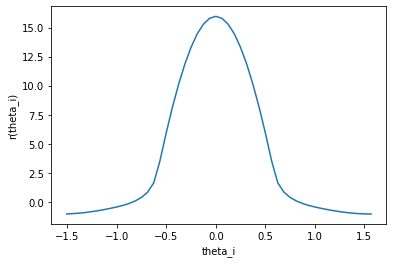

In [22]:
rates = []
angles = []
for i in range(50):
    rates.append(min_ri.item((i,0)))
    angles.append((math.pi / 50)*(i+1) - (math.pi/2))
plt.plot(angles, rates)
plt.ylabel("r(theta_i)")
plt.xlabel("theta_i")
plt.show()

### Tuning curve of the neuron at theta = 0

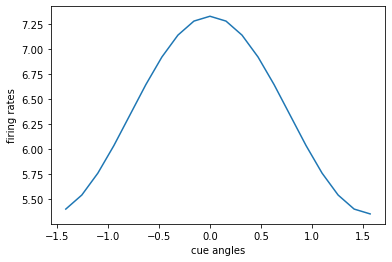

In [14]:
input_angles = []
res_firing_rates = []
for k in range(20):
    cue = (math.pi / 20)*(k+1) - (math.pi/2)
    input_angles.append(cue)
    # setting the initial condition
    r_0 = 2 * math.cos(2*(-cue))
    # setting the external input
    h_0 = 40 * 0.2 * (1 - 0.1 + 0.1 * (math.cos(-2* cue)))
    # setting Runge-Kutta step size and step number
    size = 0.1
    num = 200
    # steady states var
    min_dist_val = 10000
    min_r_0= r_0
    for i in range(num):
        # setting the recurrent input
        f_0 = (-0.5 + 1)*r_0 / math.pi
        I = h_0 + f_0
        k_1 = (-r_0 + F(I))/10
        k_2 = (-(r_0 + (size/2) * k_1) + F(h_0 + (-0.5 + 1)*((size/2) * k_1) / math.pi))/10
        k_3 = (-(r_0 + (size/2) * k_2) + F(h_0 + (-0.5 + 1)*((size/2) * k_2) / math.pi))/10
        k_4 = (-(r_0 + size * k_3) + F(h_0 + (-0.5 + 1)*(size * k_3) / math.pi))/10
        r_0 += (size)/6 *(k_1 + 2*k_2 + 2*k_3 + k_4)
        if abs((-r_0 + F(I))/10) <= min_dist_val:
            min_dist_val = abs((-r_0 + F(I))/10)
            min_r_0 = r_0
    res_firing_rates.append(min_r_0)
#plot them
plt.plot(input_angles, res_firing_rates)
plt.xlabel("cue angles")
plt.ylabel("firing rates")
plt.show()

## Q(1) c = 0.4

In [23]:
# setting the initial condition
init = initial_cond(2,0,50)
r_i = init
r_i = np.asmatrix(r_i)
r_i = r_i.transpose()
print(r_i)

[[-1.9842294 ]
 [-1.93716632]
 [-1.85955297]
 [-1.75261336]
 [-1.61803399]
 [-1.45793725]
 [-1.27484798]
 [-1.07165359]
 [-0.85155858]
 [-0.61803399]
 [-0.37476263]
 [-0.12558104]
 [ 0.12558104]
 [ 0.37476263]
 [ 0.61803399]
 [ 0.85155858]
 [ 1.07165359]
 [ 1.27484798]
 [ 1.45793725]
 [ 1.61803399]
 [ 1.75261336]
 [ 1.85955297]
 [ 1.93716632]
 [ 1.9842294 ]
 [ 2.        ]
 [ 1.9842294 ]
 [ 1.93716632]
 [ 1.85955297]
 [ 1.75261336]
 [ 1.61803399]
 [ 1.45793725]
 [ 1.27484798]
 [ 1.07165359]
 [ 0.85155858]
 [ 0.61803399]
 [ 0.37476263]
 [ 0.12558104]
 [-0.12558104]
 [-0.37476263]
 [-0.61803399]
 [-0.85155858]
 [-1.07165359]
 [-1.27484798]
 [-1.45793725]
 [-1.61803399]
 [-1.75261336]
 [-1.85955297]
 [-1.93716632]
 [-1.9842294 ]
 [-2.        ]]


In [24]:
# setting the external input vector
ext_in = ext_input_2(40, 0.4, 0, 0.1, 50)
ext_in = np.asmatrix(ext_in)
ext_in = ext_in.transpose()

In [25]:
rec_in = rec_input_2(-0.5, 1, 50)

In [26]:
step_size = 0.1
num_steps = 500

min_ri = r_i
min_dist = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
print(-1, min_dist)
for i in range(num_steps):
    k_1 = Runge_Kutta_step(ext_in, rec_in, r_i, 10)
    k_2 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_1), 10)
    k_3 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_2), 10)
    k_4 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, step_size * k_3), 10)
    r_i = np.add(r_i, (step_size/6) * np.add(k_1, np.add(2*k_2, np.add(2*k_3, k_4))))
    # print(i, r_i)
    d = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
    # print(i, d)
    if d <= min_dist:
        print(i)
        min_ri = r_i
        min_dist = d
print(min_ri)
print(min_dist)

-1 12.811480715962615
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
[[-1.29075927]
 [-1.26014431]
 [-1.20965612]
 [-1.14009093]
 [-1.05229682]
 [-0.94391861]
 [-0.81111442]
 [-0.64985716]
 [-0.45459389]
 [-0.21467655]
 [ 0.08721726]
 [ 0.48144792]
 [ 1.0310393 ]
 [ 1.88084497]
 [ 3.42859858]
 [ 5.32698371]
 [ 7.11619607]
 [ 8.76801869]
 [10.25640136]
 [11.55787139]
 [12.65190381]
 [13.52124509]
 [14.15218519]
 [14.53477381]
 [14.6629773 ]
 [14.53477381]
 [14.15218519]
 [13.52124509]
 [12.65190381]
 [11.55787139]
 [10.25640136]
 [ 8.76801869]
 [ 7.11619607]
 [ 5.32698371]
 [ 3.42859858]
 [ 1.88084497]
 [ 1.0310393 ]
 [ 0.48144792]
 [ 0.08721726]
 [-0.21467655]
 [-0.45459389]
 [-0.64985716]
 [-0.81111442]
 [-0.94391861]
 [-1.05229682]
 [-1.14009093]
 [-1.20965612]
 [-1.26014431]
 [-1.29075927]
 [-1.30101819]]
9.607644759019315


### Activity Profile Plot

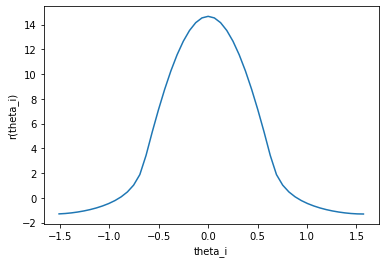

In [27]:
rates = []
angles = []
for i in range(50):
    rates.append(min_ri.item((i,0)))
    angles.append((math.pi / 50)*(i+1) - (math.pi/2))
plt.plot(angles, rates)
plt.ylabel("r(theta_i)")
plt.xlabel("theta_i")
plt.show()

### Tuning curve of the neuron, theta = 0

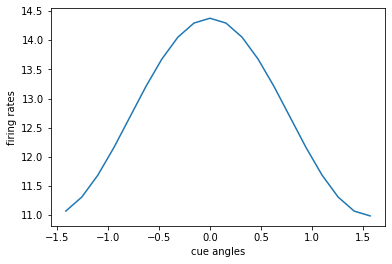

In [15]:
input_angles = []
res_firing_rates = []
for k in range(20):
    cue = (math.pi / 20)*(k+1) - (math.pi/2)
    input_angles.append(cue)
    # setting the initial condition
    r_0 = 2 * math.cos(2*(-cue))
    # setting the external input
    h_0 = 40 * 0.4 * (1 - 0.1 + 0.1 * (math.cos(-2* cue)))
    # setting Runge-Kutta step size and step number
    size = 0.1
    num = 200
    # steady states var
    min_dist_val = 10000
    min_r_0= r_0
    for i in range(num):
        # setting the recurrent input
        f_0 = (-0.5 + 1)*r_0 / math.pi
        I = h_0 + f_0
        k_1 = (-r_0 + F(I))/10
        k_2 = (-(r_0 + (size/2) * k_1) + F(h_0 + (-0.5 + 1)*((size/2) * k_1) / math.pi))/10
        k_3 = (-(r_0 + (size/2) * k_2) + F(h_0 + (-0.5 + 1)*((size/2) * k_2) / math.pi))/10
        k_4 = (-(r_0 + size * k_3) + F(h_0 + (-0.5 + 1)*(size * k_3) / math.pi))/10
        r_0 += (size)/6 *(k_1 + 2*k_2 + 2*k_3 + k_4)
        if abs((-r_0 + F(I))/10) <= min_dist_val:
            min_dist_val = abs((-r_0 + F(I))/10)
            min_r_0 = r_0
    res_firing_rates.append(min_r_0)
#plot them
plt.plot(input_angles, res_firing_rates)
plt.xlabel("cue angles")
plt.ylabel("firing rates")
plt.show()

## Q(1) c = 0.8

In [28]:
# setting the initial condition
init = initial_cond(2,0,50)
r_i = init
r_i = np.asmatrix(r_i)
r_i = r_i.transpose()
print(r_i)

[[-1.9842294 ]
 [-1.93716632]
 [-1.85955297]
 [-1.75261336]
 [-1.61803399]
 [-1.45793725]
 [-1.27484798]
 [-1.07165359]
 [-0.85155858]
 [-0.61803399]
 [-0.37476263]
 [-0.12558104]
 [ 0.12558104]
 [ 0.37476263]
 [ 0.61803399]
 [ 0.85155858]
 [ 1.07165359]
 [ 1.27484798]
 [ 1.45793725]
 [ 1.61803399]
 [ 1.75261336]
 [ 1.85955297]
 [ 1.93716632]
 [ 1.9842294 ]
 [ 2.        ]
 [ 1.9842294 ]
 [ 1.93716632]
 [ 1.85955297]
 [ 1.75261336]
 [ 1.61803399]
 [ 1.45793725]
 [ 1.27484798]
 [ 1.07165359]
 [ 0.85155858]
 [ 0.61803399]
 [ 0.37476263]
 [ 0.12558104]
 [-0.12558104]
 [-0.37476263]
 [-0.61803399]
 [-0.85155858]
 [-1.07165359]
 [-1.27484798]
 [-1.45793725]
 [-1.61803399]
 [-1.75261336]
 [-1.85955297]
 [-1.93716632]
 [-1.9842294 ]
 [-2.        ]]


In [29]:
# setting the external input vector
ext_in = ext_input_2(40, 0.8, 0, 0.1, 50)
ext_in = np.asmatrix(ext_in)
ext_in = ext_in.transpose()

In [30]:
rec_in = rec_input_2(-0.5, 1, 50)

In [31]:
step_size = 0.1
num_steps = 500

min_ri = r_i
min_dist = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
print(-1, min_dist)
for i in range(num_steps):
    k_1 = Runge_Kutta_step(ext_in, rec_in, r_i, 10)
    k_2 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_1), 10)
    k_3 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_2), 10)
    k_4 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, step_size * k_3), 10)
    r_i = np.add(r_i, (step_size/6) * np.add(k_1, np.add(2*k_2, np.add(2*k_3, k_4))))
    # print(i, r_i)
    d = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
    # print(i, d)
    if d <= min_dist:
        print(i)
        min_ri = r_i
        min_dist = d
print(min_ri)
print(min_dist)

-1 22.089704306802634
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
[[-1.34080970e+00]
 [-1.29623466e+00]
 [-1.22079792e+00]
 [-1.11415630e+00]
 [-9.73039980e-01]
 [-7.95882206e-01]
 [-5.77596040e-01]
 [-3.11506699e-01]
 [ 1.35553194e-02]
 [ 4.16316708e-01]
 [ 9.27650245e-01]
 [ 1.60682004e+00]
 [ 2.57436042e+00]
 [ 4.09282931e+00]
 [ 5.83483412e+00]
 [ 7.50704480e+00]
 [ 9.08308959e+00]
 [ 1.05381133e+01]
 [ 1.18491694e+01]
 [ 1.29955817e+01]
 [ 1.39592706e+01]
 [ 1.47250382e+01]
 [ 1.52808078e+01]
 [ 1.56178147e+01]
 [ 1.57307439e+01]
 [ 1.56178147e+01]
 [ 1.52808078e+01]
 [ 1.47250382e+01]
 [ 1.39592706e+01]
 [ 1.29955817e+01]
 [ 1.18491694e+01]
 [ 1.05381133e+01]
 [ 9.08308959e+00]
 [ 7.50704480e+00]
 [ 5.83483412e+00]
 [ 4.09282931e+00]
 [ 2.57436042e+00]
 [ 1.60682004e+00]
 [ 9.27650245e-01]
 [ 4.16316708e-01]
 [ 1.35553194e-02]
 [-3.11506699e-01]
 [-5.77596040e-01]
 [-7.95882206e-01]
 [-9.73039980e-01]
 [-1.11415630e+00]
 [-1.22079792e+00]

### Activity Profile Plot

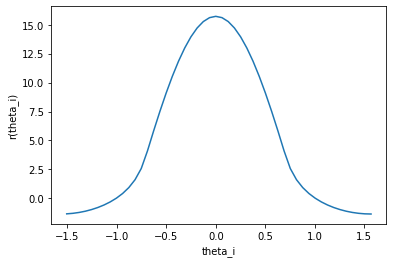

In [32]:
rates = []
angles = []
for i in range(50):
    rates.append(min_ri.item((i,0)))
    angles.append((math.pi / 50)*(i+1) - (math.pi/2))
plt.plot(angles, rates)
plt.ylabel("r(theta_i)")
plt.xlabel("theta_i")
plt.show()

### Tuning Curve of the Neuron, theta = 0

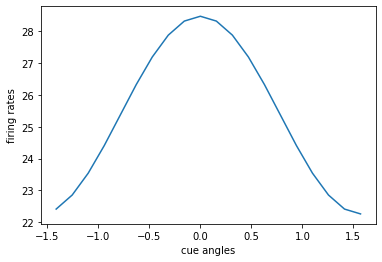

In [16]:
input_angles = []
res_firing_rates = []
for k in range(20):
    cue = (math.pi / 20)*(k+1) - (math.pi/2)
    input_angles.append(cue)
    # setting the initial condition
    r_0 = 2 * math.cos(2*(-cue))
    # setting the external input
    h_0 = 40 * 0.8 * (1 - 0.1 + 0.1 * (math.cos(-2* cue)))
    # setting Runge-Kutta step size and step number
    size = 0.1
    num = 200
    # steady states var
    min_dist_val = 10000
    min_r_0= r_0
    for i in range(num):
        # setting the recurrent input
        f_0 = (-0.5 + 1)*r_0 / math.pi
        I = h_0 + f_0
        k_1 = (-r_0 + F(I))/10
        k_2 = (-(r_0 + (size/2) * k_1) + F(h_0 + (-0.5 + 1)*((size/2) * k_1) / math.pi))/10
        k_3 = (-(r_0 + (size/2) * k_2) + F(h_0 + (-0.5 + 1)*((size/2) * k_2) / math.pi))/10
        k_4 = (-(r_0 + size * k_3) + F(h_0 + (-0.5 + 1)*(size * k_3) / math.pi))/10
        r_0 += (size)/6 *(k_1 + 2*k_2 + 2*k_3 + k_4)
        if abs((-r_0 + F(I))/10) <= min_dist_val:
            min_dist_val = abs((-r_0 + F(I))/10)
            min_r_0 = r_0
    res_firing_rates.append(min_r_0)
#plot them
plt.plot(input_angles, res_firing_rates)
plt.xlabel("cue angles")
plt.ylabel("firing rates")
plt.show()

## Q(2) c = 0.1

In [13]:
# setting the initial condition
init = initial_cond(2,0,50)
r_i = init
r_i = np.asmatrix(r_i)
r_i = r_i.transpose()
print(r_i)

[[-1.9842294 ]
 [-1.93716632]
 [-1.85955297]
 [-1.75261336]
 [-1.61803399]
 [-1.45793725]
 [-1.27484798]
 [-1.07165359]
 [-0.85155858]
 [-0.61803399]
 [-0.37476263]
 [-0.12558104]
 [ 0.12558104]
 [ 0.37476263]
 [ 0.61803399]
 [ 0.85155858]
 [ 1.07165359]
 [ 1.27484798]
 [ 1.45793725]
 [ 1.61803399]
 [ 1.75261336]
 [ 1.85955297]
 [ 1.93716632]
 [ 1.9842294 ]
 [ 2.        ]
 [ 1.9842294 ]
 [ 1.93716632]
 [ 1.85955297]
 [ 1.75261336]
 [ 1.61803399]
 [ 1.45793725]
 [ 1.27484798]
 [ 1.07165359]
 [ 0.85155858]
 [ 0.61803399]
 [ 0.37476263]
 [ 0.12558104]
 [-0.12558104]
 [-0.37476263]
 [-0.61803399]
 [-0.85155858]
 [-1.07165359]
 [-1.27484798]
 [-1.45793725]
 [-1.61803399]
 [-1.75261336]
 [-1.85955297]
 [-1.93716632]
 [-1.9842294 ]
 [-2.        ]]


In [14]:
# setting the external input vector
ext_in = ext_input_2(40, 0.1, 0, 0.1, 50)
ext_in = np.asmatrix(ext_in)
ext_in = ext_in.transpose()

In [15]:
rec_in = rec_input_2(-7.3, 11, 50)

In [16]:
step_size = 0.001
num_steps = 200

min_ri = r_i
min_dist = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
print(-1, min_dist)
for i in range(num_steps):
    k_1 = Runge_Kutta_step(ext_in, rec_in, r_i, 10)
    k_2 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_1), 10)
    k_3 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_2), 10)
    k_4 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, step_size * k_3), 10)
    r_i = np.add(r_i, (step_size/6) * np.add(k_1, np.add(2*k_2, np.add(2*k_3, k_4))))
    # print(i, r_i)
    d = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
    # print(i, d)
    if d <= min_dist:
        print(i)
        min_ri = r_i
        min_dist = d
print(min_ri)
print(min_dist)

-1 62.96151534133778
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
[[-1.96743493]
 [-1.92077019]
 [-1.84381376]
 [-1.73777928]
 [-1.60433899]
 [-1.44559731]
 [-1.2640577 ]
 [-1.06258314]
 [-0.84435101]
 [-0.61280296]
 [-0.37159065]
 [-0.12451812]
 [ 0.14180003]
 [ 0.50267089]
 [ 0.95478907]
 [ 1.3917406 ]
 [ 1.80356381]
 [ 2.18376402]
 [ 2.52634524]
 [ 2.82590474]
 [ 3.07771832]
 [ 3.2778147 ]
 [ 3.42303826]
 [ 3.51109873]
 [ 3.54060734]
 [ 3.51109873]
 [ 3.42303826]
 [ 3.2778147 ]
 [ 3.07771832]
 [ 2.82590474]
 [ 2.52634524]
 [ 2.18376402]
 [ 1.80356381]
 [ 1.3917406 ]
 [ 0.95478907]
 [ 0.50267089]
 [ 0.14180003]
 [-0.12451812]
 [-0.37159065]
 [-0.61280296]
 [-0.84435101]
 [-1.06258314]
 [-1.2640577 ]
 [-1.44559731]
 [-1.60433899]
 [-1.73777928]
 [-1.84381376]
 [-1.92077019]
 [-1.96743493]

### Activity Profile Plot

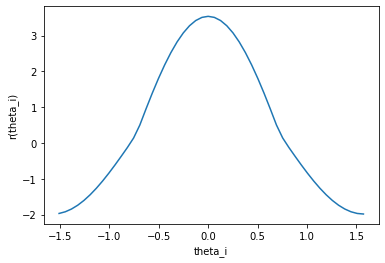

In [17]:
rates = []
angles = []
for i in range(50):
    rates.append(min_ri.item((i,0)))
    angles.append((math.pi / 50)*(i+1) - (math.pi/2))
plt.plot(angles, rates)
plt.ylabel("r(theta_i)")
plt.xlabel("theta_i")
plt.show()

## Q(2) c = 0.2

In [18]:
# setting the initial condition
init = initial_cond(2,0,50)
r_i = init
r_i = np.asmatrix(r_i)
r_i = r_i.transpose()

In [19]:
# setting the external input vector
ext_in = ext_input_2(40, 0.2, 0, 0.1, 50)
ext_in = np.asmatrix(ext_in)
ext_in = ext_in.transpose()

In [20]:
rec_in = rec_input_2(-7.3, 11, 50)

In [21]:
step_size = 0.001
num_steps = 200

min_ri = r_i
min_dist = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
print(-1, min_dist)
for i in range(num_steps):
    k_1 = Runge_Kutta_step(ext_in, rec_in, r_i, 10)
    k_2 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_1), 10)
    k_3 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_2), 10)
    k_4 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, step_size * k_3), 10)
    r_i = np.add(r_i, (step_size/6) * np.add(k_1, np.add(2*k_2, np.add(2*k_3, k_4))))
    # print(i, r_i)
    d = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
    # print(i, d)
    if d <= min_dist:
        print(i)
        min_ri = r_i
        min_dist = d
print(min_ri)
print(min_dist)

-1 64.73847485317832
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
[[-1.96645146]
 [-1.91981005]
 [-1.84289208]
 [-1.73691061]
 [-1.60353702]
 [-1.44487469]
 [-1.26342582]
 [-1.06205198]
 [-0.84392894]
 [-0.61249664]
 [-0.3714049 ]
 [-0.12445588]
 [ 0.15056234]
 [ 0.52543534]
 [ 0.99348186]
 [ 1.44572741]
 [ 1.87196512]
 [ 2.26547296]
 [ 2.62004508]
 [ 2.93008966]
 [ 3.19071712]
 [ 3.39781721]
 [ 3.54812383]
 [ 3.63926656]
 [ 3.66980802]
 [ 3.63926656]
 [ 3.54812383]
 [ 3.39781721]
 [ 3.19071712]
 [ 2.93008966]
 [ 2.62004508]
 [ 2.26547296]
 [ 1.87196512]
 [ 1.44572741]
 [ 0.99348186]
 [ 0.52543534]
 [ 0.15056234]
 [-0.12445588]
 [-0.3714049 ]
 [-0.61249664]
 [-0.84392894]
 [-1.06205198]
 [-1.26342582]
 [-1.44487469]
 [-1.60353702]
 [-1.73691061]
 [-1.84289208]
 [-1.91981005]

### Activity Profile Plot

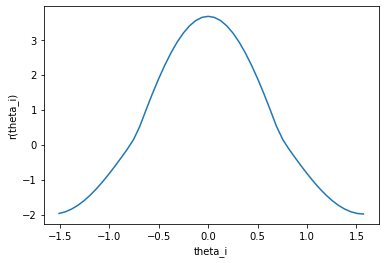

In [22]:
rates = []
angles = []
for i in range(50):
    rates.append(min_ri.item((i,0)))
    angles.append((math.pi / 50)*(i+1) - (math.pi/2))
plt.plot(angles, rates)
plt.ylabel("r(theta_i)")
plt.xlabel("theta_i")
plt.show()

## Q(2) c = 0.4

In [23]:
# setting the initial condition
init = initial_cond(2,0,50)
r_i = init
r_i = np.asmatrix(r_i)
r_i = r_i.transpose()

In [24]:
# setting the external input vector
ext_in = ext_input_2(40, 0.4, 0, 0.1, 50)
ext_in = np.asmatrix(ext_in)
ext_in = ext_in.transpose()

In [25]:
rec_in = rec_input_2(-7.3, 11, 50)

In [26]:
step_size = 0.001
num_steps = 200

min_ri = r_i
min_dist = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
print(-1, min_dist)
for i in range(num_steps):
    k_1 = Runge_Kutta_step(ext_in, rec_in, r_i, 10)
    k_2 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_1), 10)
    k_3 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_2), 10)
    k_4 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, step_size * k_3), 10)
    r_i = np.add(r_i, (step_size/6) * np.add(k_1, np.add(2*k_2, np.add(2*k_3, k_4))))
    # print(i, r_i)
    d = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
    # print(i, d)
    if d <= min_dist:
        print(i)
        min_ri = r_i
        min_dist = d
print(min_ri)
print(min_dist)

-1 68.31875923975653
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
[[-1.96487893]
 [-1.91827481]
 [-1.84141836]
 [-1.73552164]
 [-1.6022547 ]
 [-1.44371925]
 [-1.26241549]
 [-1.06120268]
 [-0.84325407]
 [-0.61200684]
 [-0.37110789]
 [-0.12366915]
 [ 0.17244065]
 [ 0.57440784]
 [ 1.07028935]
 [ 1.54865592]
 [ 1.99951248]
 [ 2.41574874]
 [ 2.79080041]
 [ 3.11875271]
 [ 3.39443362]
 [ 3.61349549]
 [ 3.7724836 ]
 [ 3.8688906 ]
 [ 3.90119609]
 [ 3.8688906 ]
 [ 3.7724836 ]
 [ 3.61349549]
 [ 3.39443362]
 [ 3.11875271]
 [ 2.79080041]
 [ 2.41574874]
 [ 1.99951248]
 [ 1.54865592]
 [ 1.07028935]
 [ 0.57440784]
 [ 0.17244065]
 [-0.12366915]
 [-0.37110789]
 [-0.61200684]
 [-0.84325407]
 [-1.06120268]
 [-1.26241549]
 [-1.44371925]
 [-1.6022547 ]
 [-1.73552164]
 [-1.

### Activity Profile Plot

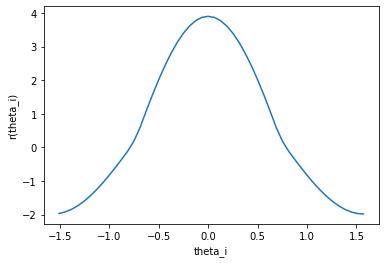

In [27]:
rates = []
angles = []
for i in range(50):
    rates.append(min_ri.item((i,0)))
    angles.append((math.pi / 50)*(i+1) - (math.pi/2))
plt.plot(angles, rates)
plt.ylabel("r(theta_i)")
plt.xlabel("theta_i")
plt.show()

## Q(2) c = 0.8

In [28]:
# setting the initial condition
init = initial_cond(2,0,50)
r_i = init
r_i = np.asmatrix(r_i)
r_i = r_i.transpose()

In [29]:
# setting the external input vector
ext_in = ext_input_2(40, 0.8, 0, 0.1, 50)
ext_in = np.asmatrix(ext_in)
ext_in = ext_in.transpose()

In [30]:
rec_in = rec_input_2(-7.3, 11, 50)

In [31]:
step_size = 0.001
num_steps = 200

min_ri = r_i
min_dist = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
print(-1, min_dist)
for i in range(num_steps):
    k_1 = Runge_Kutta_step(ext_in, rec_in, r_i, 10)
    k_2 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_1), 10)
    k_3 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_2), 10)
    k_4 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, step_size * k_3), 10)
    r_i = np.add(r_i, (step_size/6) * np.add(k_1, np.add(2*k_2, np.add(2*k_3, k_4))))
    # print(i, r_i)
    d = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
    # print(i, d)
    if d <= min_dist:
        print(i)
        min_ri = r_i
        min_dist = d
print(min_ri)
print(min_dist)

-1 75.59794002342254
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
[[-1.96232624]
 [-1.91578267]
 [-1.83902607]
 [-1.73326692]
 [-1.60017312]
 [-1.44184364]
 [-1.26077541]
 [-1.05982401]
 [-0.84215855]
 [-0.61121174]
 [-0.37062577]
 [-0.10676846]
 [ 0.23025768]
 [ 0.68306226]
 [ 1.22921721]
 [ 1.75468934]
 [ 2.2499425 ]
 [ 2.70716624]
 [ 3.11914988]
 [ 3.47939618]
 [ 3.78222385]
 [ 4.02285712]
 [ 4.19750105]
 [ 4.3034014 ]
 [ 4.33888807]
 [ 4.3034014 ]
 [ 4.19750105]
 [ 4.02285712]
 [ 3.78222385]
 [ 3.47939618]
 [ 3.11914988]
 [ 2.70716624]
 [ 2.2499425 ]
 [ 1.75468934]
 [ 1.22921721]
 [ 0.68306226]
 [ 0.23025768]
 [-0.10676846]
 [-0.37062577]
 [-0.61121174]
 [-0.84215855]
 [-1.05982401]
 [-1.26077541]


### Activity Profile Plot

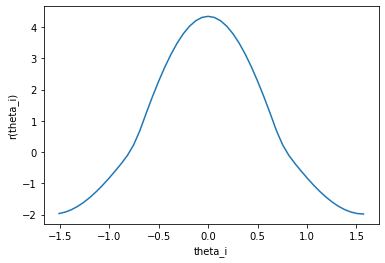

In [32]:
rates = []
angles = []
for i in range(50):
    rates.append(min_ri.item((i,0)))
    angles.append((math.pi / 50)*(i+1) - (math.pi/2))
plt.plot(angles, rates)
plt.ylabel("r(theta_i)")
plt.xlabel("theta_i")
plt.show()

## Q(3) 

In [19]:
# building external input with noises
ext_inputs_noise = []
angles = []
for i in range(50):
    alpha = (math.pi / 50)*(i+1) - (math.pi/2)
    angles.append(alpha)
    ext_input_noise = 40 * 0.1 * (1 - 0.1 + 0.1 * math.cos(2*alpha)) + 3 * np.random.normal(0, 3)
    ext_inputs_noise.append(ext_input_noise)

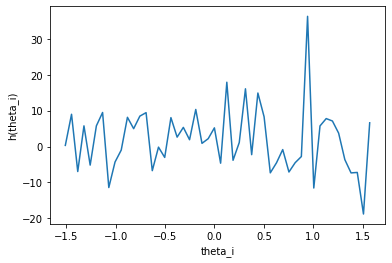

In [20]:
plt.plot(angles , ext_inputs_noise)
plt.ylabel("h(theta_i)")
plt.xlabel("theta_i")
plt.show()

In [21]:
# reshaping before Runge Kutta
ext_in = np.array(ext_inputs_noise)
ext_in = np.asmatrix(ext_in)
ext_in = ext_in.transpose()


In [22]:
rec_in = rec_input_2(-0.5, 1, 50)

In [23]:
# setting the initial condition
init = initial_cond(2,0,50)
r_i = init
r_i = np.asmatrix(r_i)
r_i = r_i.transpose()

In [24]:
step_size = 0.001
num_steps = 200

min_ri = r_i
min_dist = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
print(-1, min_dist)
for i in range(num_steps):
    k_1 = Runge_Kutta_step(ext_in, rec_in, r_i, 10)
    k_2 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_1), 10)
    k_3 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_2), 10)
    k_4 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, step_size * k_3), 10)
    r_i = np.add(r_i, (step_size/6) * np.add(k_1, np.add(2*k_2, np.add(2*k_3, k_4))))
    # print(i, r_i)
    d = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
    # print(i, d)
    if d <= min_dist:
        print(i)
        min_ri = r_i
        min_dist = d

-1 8.157186030599885
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


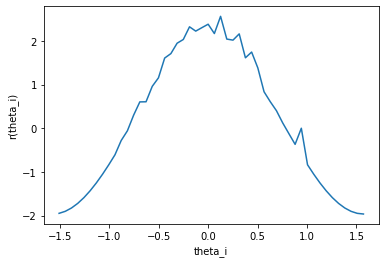

In [25]:
rates = []
angles = []
for i in range(50):
    rates.append(min_ri.item((i,0)))
    angles.append((math.pi / 50)*(i+1) - (math.pi/2))
plt.plot(angles, rates)
plt.ylabel("r(theta_i)")
plt.xlabel("theta_i")
plt.show()

## Q(4) Exploring the Parameter Space (J_0, J_2)

### (J_0, J_2) = (-1,1)

In [26]:
# setting the initial condition
init = initial_cond(2,0,50)
r_i = init
r_i = np.asmatrix(r_i)
r_i = r_i.transpose()

In [27]:
# setting the external input vector
ext_in = ext_input_2(40, 0.1, 0, 0, 50)
ext_in = np.asmatrix(ext_in)
ext_in = ext_in.transpose()

In [28]:
rec_in = rec_input_2(-1, 1, 50)

In [29]:
step_size = 0.001
num_steps = 200

min_ri = r_i
min_dist = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
print(-1, min_dist)
for i in range(num_steps):
    k_1 = Runge_Kutta_step(ext_in, rec_in, r_i, 10)
    k_2 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_1), 10)
    k_3 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_2), 10)
    k_4 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, step_size * k_3), 10)
    r_i = np.add(r_i, (step_size/6) * np.add(k_1, np.add(2*k_2, np.add(2*k_3, k_4))))
    # print(i, r_i)
    d = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
    # print(i, d)
    if d <= min_dist:
        print(i)
        min_ri = r_i
        min_dist = d
print(min_dist)

-1 6.831227380462409
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
6.132434069363998


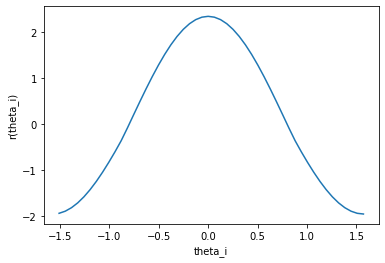

In [30]:
rates = []
angles = []
for i in range(50):
    rates.append(min_ri.item((i,0)))
    angles.append((math.pi / 50)*(i+1) - (math.pi/2))
plt.plot(angles, rates)
plt.ylabel("r(theta_i)")
plt.xlabel("theta_i")
plt.show()

### (J_0, J_2) = (-1,1.5)

In [31]:
# setting the initial condition
init = initial_cond(2,0,50)
r_i = init
r_i = np.asmatrix(r_i)
r_i = r_i.transpose()

In [32]:
# setting the external input vector
ext_in = ext_input_2(40, 0.1, 0, 0, 50)
ext_in = np.asmatrix(ext_in)
ext_in = ext_in.transpose()

In [33]:
rec_in = rec_input_2(-1, 1.5, 50)

In [34]:
step_size = 0.001
num_steps = 500

min_ri = r_i
min_dist = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
print(-1, min_dist)
for i in range(num_steps):
    k_1 = Runge_Kutta_step(ext_in, rec_in, r_i, 10)
    k_2 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_1), 10)
    k_3 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_2), 10)
    k_4 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, step_size * k_3), 10)
    r_i = np.add(r_i, (step_size/6) * np.add(k_1, np.add(2*k_2, np.add(2*k_3, k_4))))
    # print(i, r_i)
    d = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
    # print(i, d)
    if d <= min_dist:
        print(i)
        min_ri = r_i
        min_dist = d
print(min_dist)

-1 9.607846127198103
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
2

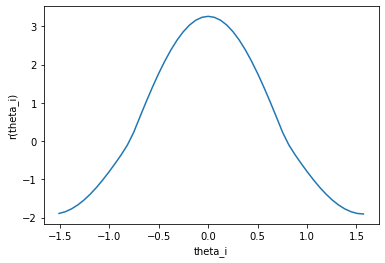

In [35]:
rates = []
angles = []
for i in range(50):
    rates.append(min_ri.item((i,0)))
    angles.append((math.pi / 50)*(i+1) - (math.pi/2))
plt.plot(angles, rates)
plt.ylabel("r(theta_i)")
plt.xlabel("theta_i")
plt.show()

### (J_0, J_2) = (-1,2.5)

In [36]:
# setting the initial condition
init = initial_cond(2,0,50)
r_i = init
r_i = np.asmatrix(r_i)
r_i = r_i.transpose()

In [37]:
# setting the external input vector
ext_in = ext_input_2(40, 0.1, 0, 0, 50)
ext_in = np.asmatrix(ext_in)
ext_in = ext_in.transpose()

In [39]:
rec_in = rec_input_2(-1, 2.5, 50)

In [41]:
step_size = 0.001
num_steps = 500

min_ri = r_i
min_dist = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
print(-1, min_dist)
for i in range(num_steps):
    k_1 = Runge_Kutta_step(ext_in, rec_in, r_i, 10)
    k_2 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_1), 10)
    k_3 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_2), 10)
    k_4 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, step_size * k_3), 10)
    r_i = np.add(r_i, (step_size/6) * np.add(k_1, np.add(2*k_2, np.add(2*k_3, k_4))))
    # print(i, r_i)
    d = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
    # print(i, d)
    if d <= min_dist:
        print(i)
        min_ri = r_i
        min_dist = d
print(min_dist)

-1 15.69194857180908
15.69194857180908


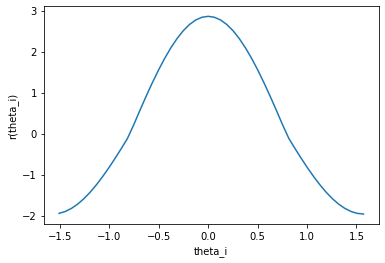

In [42]:
rates = []
angles = []
for i in range(50):
    rates.append(min_ri.item((i,0)))
    angles.append((math.pi / 50)*(i+1) - (math.pi/2))
plt.plot(angles, rates)
plt.ylabel("r(theta_i)")
plt.xlabel("theta_i")
plt.show()

### (J_0, J_2) = (-1,4.5)

In [43]:
# setting the initial condition
init = initial_cond(2,0,50)
r_i = init
r_i = np.asmatrix(r_i)
r_i = r_i.transpose()

In [44]:
# setting the external input vector
ext_in = ext_input_2(40, 0.1, 0, 0, 50)
ext_in = np.asmatrix(ext_in)
ext_in = ext_in.transpose()

In [45]:
rec_in = rec_input_2(-1, 4.5, 50)

In [46]:
step_size = 0.001
num_steps = 500

min_ri = r_i
min_dist = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
print(-1, min_dist)
for i in range(num_steps):
    k_1 = Runge_Kutta_step(ext_in, rec_in, r_i, 10)
    k_2 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_1), 10)
    k_3 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, (step_size/2) * k_2), 10)
    k_4 = Runge_Kutta_step(ext_in, rec_in, np.add(r_i, step_size * k_3), 10)
    r_i = np.add(r_i, (step_size/6) * np.add(k_1, np.add(2*k_2, np.add(2*k_3, k_4))))
    # print(i, r_i)
    d = euc_norm(Runge_Kutta_step(ext_in, rec_in, r_i, 10))
    # print(i, d)
    if d <= min_dist:
        print(i)
        min_ri = r_i
        min_dist = d
print(min_dist)

-1 26.43982206044344
26.43982206044344


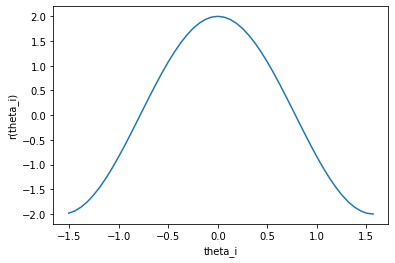

In [47]:
rates = []
angles = []
for i in range(50):
    rates.append(min_ri.item((i,0)))
    angles.append((math.pi / 50)*(i+1) - (math.pi/2))
plt.plot(angles, rates)
plt.ylabel("r(theta_i)")
plt.xlabel("theta_i")
plt.show()